In [132]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
plt.style.use('seaborn-whitegrid')

# Задача 1
Даны значения зарплат из выборки выпускников:

100, 80, 75, 77, 89, 33, 45, 25, 65, 17, 30, 230, 24, 57, 55, 70, 75, 65, 84, 90, 150

Используя только встроенные питоновские функции и структуры данных (т.е. без библиотек numpy, pandas и др.) посчитать среднее арифметическое, смещённую и несмещённую оценки дисперсии, среднее квадратичное отклонение для данной выборки.

Можно затем посчитать те же значения с использованием библиотек, чтобы проверить себя.

In [23]:
salary = [100, 80, 75, 77, 89, 33, 45, 25, 65, 17, 30, 230, 24, 57, 55, 70, 75, 65, 84, 90, 150]

Среднее арифметическое $\overline{x} = \dfrac{1}{m} \displaystyle\sum_{i = 1}^m x_i$.

In [27]:
x=0
for i in salary:
    x = x + i
mean = x/len(salary)
mean

73.14285714285714

Смещённая оценка дисперсии $\sigma^2 = \dfrac{1}{m} \displaystyle\sum_{i = 1}^m \left( x_i - \overline{x} \right)^2$.

In [72]:
x = 0
for i in salary:
    x= x + ((i - mean)**2)
Variance_biased = x/len(salary)
Variance_biased

2135.074829931973

Несмещенная оценка дисперсии $\sigma_{unbiased}^2 = \dfrac{1}{m - 1} \displaystyle\sum_{i = 1}^m \left( x_i - \overline{x} \right)^2$.

In [70]:
X = 0
for i in salary:
    X= X + ((i - mean)**2)
Variance_unbiased = x/(len(salary)-1)
Variance_unbiased

2241.8285714285716

Среднее квадратичное отклонение:$$\sigma = \sqrt{\frac{\sum\limits_{i=1}^{n} (x_i - \overline{x})^2}{n}}$$

In [78]:
x = 0
for i in salary:
    x = x + ((i - mean)**2)
Standard_deviation = (x/len(salary))**(1/2)
Standard_deviation

46.20686994302874

Проверка вычислений через встроенные функции

In [79]:

a = np.array(salary)
print("Среднее арифметическое:", a.mean(),'\tTrue', mean)
print("Смещенная дисперсия:", a.var(),'\tTrue',Variance_biased)
print("Несмещенная дисперсия:", a.var(ddof=1),'\tTrue',Variance_unbiased)
print("Квадратичное отклонение:", a.std(ddof=0),'\tTrue',Standard_deviation)

Среднее арифметическое: 73.14285714285714 	True 73.14285714285714
Смещенная дисперсия: 2135.0748299319725 	True 2135.074829931973
Несмещенная дисперсия: 2241.828571428571 	True 2241.8285714285716
Квадратичное отклонение: 46.206869943028735 	True 46.20686994302874


# Задача 2
Для выборки из задачи 1 найти (также без использования библиотек):

* медиану, первый и третий квартили, интерквартильное расстояние.
* выборсы в выборке (используя для этого метод как при построении "усов" из boxplot).

Возможные неоднозначности в вычислении квантилей можно разрешать любым способом.

In [85]:
salary_sorted = sorted(salary)
length = len(salary_sorted)
b = pd.Series(salary)
print(length)
print(salary_sorted)

21
[17, 24, 25, 30, 33, 45, 55, 57, 65, 65, 70, 75, 75, 77, 80, 84, 89, 90, 100, 150, 230]


Получили нечетную длину выборки поэтому медиана будет посередине отсортированного массива

In [103]:
# медиана позиция 11
Median = salary_sorted[length//2]
Median

70

In [95]:
# первый квартиль позиция 6
Q1 = salary_sorted[(length // 4)]
Q1

45

In [97]:
# третий квартиль позиция 11
Q3 = salary_sorted[int(length *3 // 4)]
Q3

84

In [119]:
# Интерквартильное расстояние
print([Q1,Q3])

[45, 84]


Проверим вычисления через встроенные библиотеки

In [130]:
b.quantile([0.25,0.5,0.75])

0.25    45.0
0.50    70.0
0.75    84.0
dtype: float64

In [131]:
Q1,Median,Q3

(45, 70, 84)

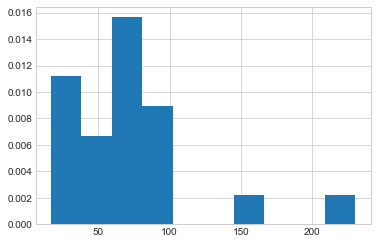

In [144]:
plt.hist(b, bins = 10,density =True)
plt.show()

Проверим выбросы используя BOXPLOT

In [178]:
# Выбросы
iqr = Q3 - Q1
boxplot_range_low = Q1 - 1.5 * iqr 
boxplot_range_high = Q3 + 1.5 * iqr

for i in range(len(salary)):
    if salary[i] < boxplot_range_low or salary[i] > boxplot_range_high:
        print(f'Выброс: сумма з/п {salary[i]} с индексом {i}')

Выброс: сумма з/п 230 с индексом 11
Выброс: сумма з/п 150 с индексом 20


In [186]:
df = pd.DataFrame(b, columns = ["salary"])

q1 = b.quantile(0.25)
q3 = b.quantile(0.75)
iqr = q3 - q1
boxplot_range = (q1 - 1.5 * iqr, q3 + 1.5 * iqr)
outliers = df.loc[(b < boxplot_range[0]) | (b > boxplot_range[1])]
outliers

,salary
11,230
20,150


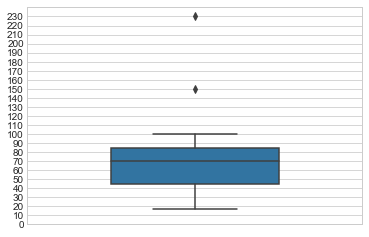

In [197]:
sns.boxplot(df, orient='v', width = 0.5)
plt.yticks(np.arange(0, 240, 10))
plt.show()

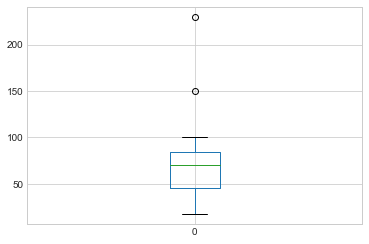

In [199]:
pd.DataFrame(b).boxplot()

# ЗАДАЧА 3

В университет на факультеты A и B поступило равное количество студентов, а на факультет C студентов поступило столько же, сколько на A и B вместе. Вероятность того, что студент факультета A сдаст первую сессию, равна 0.8. Для студента факультета B эта вероятность равна 0.7, а для студента факультета C - 0.9. Студент сдал первую сессию. Какова вероятность, что он учится: a) на факультете A? б) на факультете B? в) на факультете C?

Замечание: да, эта задача не на тему описательных статистик, но тема важная, и её стоит иногда освежать в памяти.

бозначим $A_X$ - обытие что студент учится на факультете $X$. $B$ - событие, что студент сдал первую сессию. Тогда$$P(A_A) = P(A_B) = 0.25, P(A_C) = 0.5$$$$P(B|A_A) = 0.8, P(B|A_B) = 0.7, P(B|A_C) = 0.9$$

Требуется найти вероятности $P(A_A|B), P(A_B|B), P(A_C|B)$.

Воспользуемся формулой Байеса$$P(A|B)=\frac{P(B|A) \cdot P(A)}{P(B)}$$

Найдём $P(B)$ по формуле полной вероятности.$$P(B) = P(B|A_A) \cdot P(A_A) + P(B|A_B) \cdot P(A_B) + P(B|A_C) \cdot P(A_C)$$$$P(B) = 0.8 \cdot 0.25 + 0.7 \cdot 0.25 + 0.9 \cdot 0.5 = 0.825$$

Посчитаем искомые вероятности.$$P(A_A|B) = \frac{0.8 \cdot 0.25}{0.825} = 0.24(24)$$$$P(A_B|B) = \frac{0.7 \cdot 0.25}{0.825} = 0.21(21)$$$$P(A_C|B) = \frac{0.9 \cdot 0.5}{0.825} = 0.54(54)$$

Ответ: а) 0.24; б) 0.21; с) 0.55.